In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Here is two columns 1. Id 2. Unnamed is redundent columns. now we have to remove it.

###### Drop redundant columns

We should drop any redundant columns from the dataset which does not have any predictive power. Here, Id is the redundant column. So, I will drop it first.

In [9]:
df_1 = df.drop(['id', 'Unnamed: 32'], axis= 1)
df_1.shape

(569, 31)

##### Summery of data set

In [12]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [17]:
# for var in df_1.columns: 
#     print(df_1[var].value_counts())

In [19]:
df_1.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [20]:
df_1.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

###### check percentage of frequency distribution of Class

In [22]:
df_1['diagnosis'].value_counts()/np.float(len(df_1))

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [23]:
correlation = df_1.corr()

In [28]:
correlation['area_worst'].sort_values(ascending=False)

area_worst                 1.000000
radius_worst               0.984015
perimeter_worst            0.977578
area_mean                  0.959213
perimeter_mean             0.941550
radius_mean                0.941082
area_se                    0.811408
concave points_mean        0.809630
radius_se                  0.751548
concave points_worst       0.747419
perimeter_se               0.730713
concavity_mean             0.675987
concavity_worst            0.543331
compactness_mean           0.509604
compactness_worst          0.438296
texture_worst              0.345842
texture_mean               0.343546
concave points_se          0.342271
symmetry_worst             0.209146
smoothness_worst           0.209145
smoothness_mean            0.206718
compactness_se             0.199371
concavity_se               0.188353
symmetry_mean              0.177193
fractal_dimension_worst    0.079647
fractal_dimension_se      -0.022736
texture_se                -0.083195
symmetry_se               -0

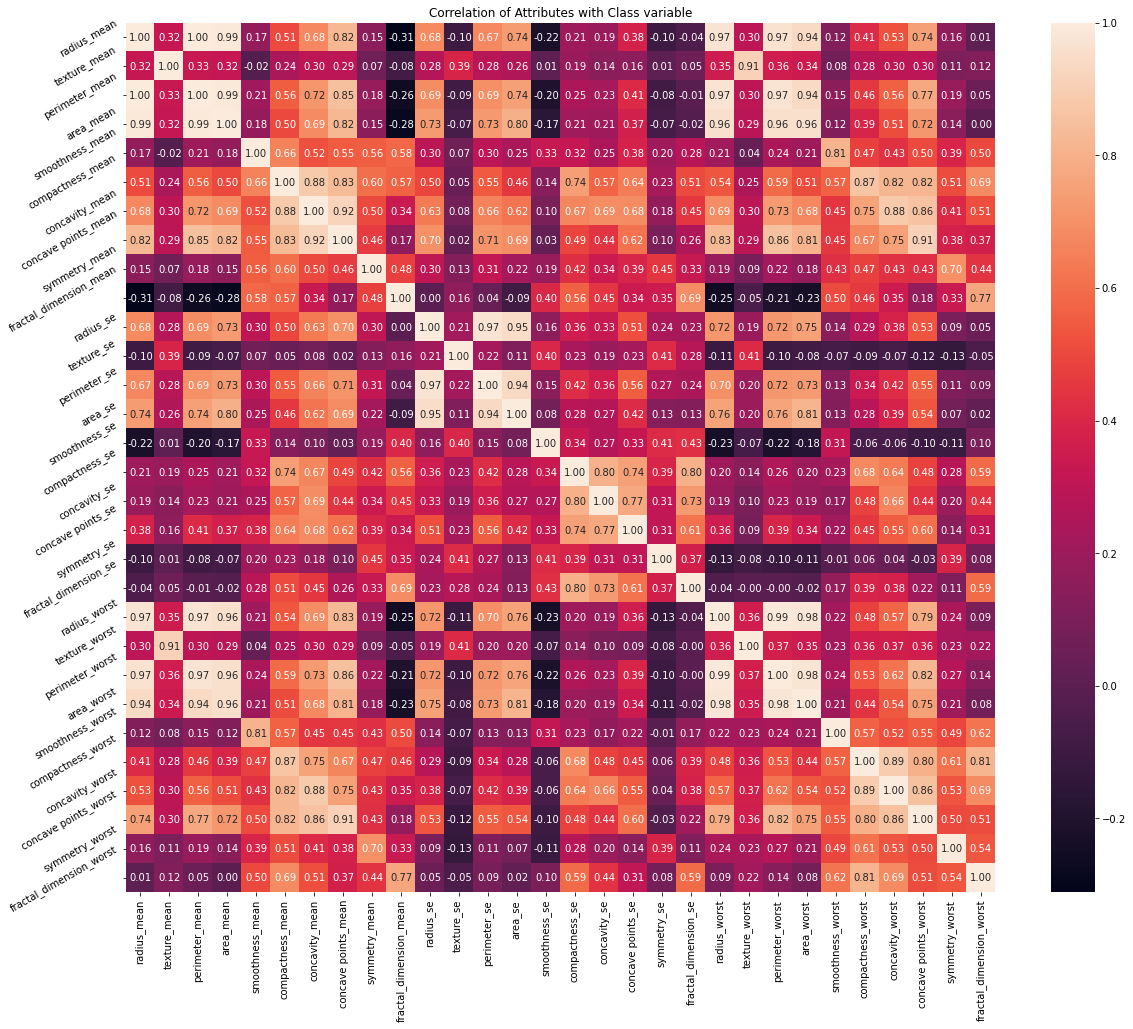

In [31]:
plt.figure(figsize=(20,16))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

###### Declare feature vector and target variable

In [32]:
X = df_1.drop(['diagnosis'] , axis= 1)
y = df_1['diagnosis']

###### Split data into separate training and test set

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 5)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [37]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.isnull().sum())
print(y_test.isnull().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
s

##### Feature scaling

In [38]:
cols = X_train.columns

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [43]:
X_test = pd.DataFrame(X_test, columns = [cols])

In [44]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.250147,-0.767966,-0.311695,-0.324081,-0.799677,-0.978364,-1.093146,-1.181031,-0.639199,-0.532184,...,-0.371365,-0.807810,-0.443416,-0.423707,-0.865690,-0.748543,-1.265893,-1.360330,-0.387663,0.023500
1,-0.783184,-0.355792,-0.799459,-0.728135,-0.552631,-0.966145,-0.749131,-0.708844,-0.753267,-0.504517,...,-0.663424,1.804030,-0.658985,-0.640708,0.594854,-0.564666,-0.412071,-0.389972,0.160661,-0.338731
2,1.163560,0.649912,1.092208,1.106126,-1.611296,-0.310039,0.326786,0.270188,-0.131414,-1.338913,...,0.777546,-0.108357,0.710641,0.685887,-1.970310,-0.337486,-0.048229,-0.314353,-0.867873,-1.010556
3,-1.012043,0.268357,-0.898023,-0.908858,-0.399563,1.258386,1.862319,0.313576,1.406659,3.189834,...,-1.135873,-0.417762,-0.925259,-0.958700,-0.798280,0.765774,1.708161,0.541873,-0.479618,2.069539
4,1.545956,1.040888,1.585027,1.491080,0.452637,1.057356,1.560953,1.097494,0.633943,-0.377828,...,1.183422,0.851128,1.202126,1.040671,0.639793,0.332065,0.415619,0.696867,0.070409,-0.412875


We now have X_train dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

###### Model Training 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit (X_train , y_train)

KNeighborsClassifier()

In [46]:
y_pred = knn.predict(X_test)
y_pred

array(['M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M'], dtype=object)

###### predict_proba method 

In [47]:
knn.predict_proba(X_test)[:,0]

array([0. , 1. , 1. , 1. , 1. , 0. , 1. , 1. , 0.8, 1. , 1. , 0.6, 0. ,
       1. , 1. , 1. , 0.8, 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. ,
       0.8, 0. , 0.8, 0. , 0. , 0. , 0.8, 0. , 1. , 1. , 0. , 1. , 1. ,
       0. , 0.8, 1. , 1. , 0. , 1. , 1. , 0. , 0. , 1. , 0. , 1. , 1. ,
       1. , 1. , 1. , 0. , 0. , 0. , 1. , 0. , 0.4, 0. , 1. , 1. , 1. ,
       0.8, 1. , 1. , 1. , 0. , 1. , 0. , 1. , 0.8, 0.8, 1. , 0. , 1. ,
       0. , 0.4, 0. , 1. , 0. , 0. , 0. , 1. , 0. , 0.8, 0. , 0. , 0. ,
       0. , 1. , 0.8, 0. , 0. , 1. , 1. , 1. , 1. , 1. , 0. , 0.8, 1. ,
       0. , 0. , 1. , 0. , 1. , 1. , 1. , 0. , 0. , 0.2])

In [49]:
knn.predict_proba(X_test)[:,1]

array([1. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0.2, 0. , 0. , 0.4, 1. ,
       0. , 0. , 0. , 0.2, 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ,
       0.2, 1. , 0.2, 1. , 1. , 1. , 0.2, 1. , 0. , 0. , 1. , 0. , 0. ,
       1. , 0.2, 0. , 0. , 1. , 0. , 0. , 1. , 1. , 0. , 1. , 0. , 0. ,
       0. , 0. , 0. , 1. , 1. , 1. , 0. , 1. , 0.6, 1. , 0. , 0. , 0. ,
       0.2, 0. , 0. , 0. , 1. , 0. , 1. , 0. , 0.2, 0.2, 0. , 1. , 0. ,
       1. , 0.6, 1. , 0. , 1. , 1. , 1. , 0. , 1. , 0.2, 1. , 1. , 1. ,
       1. , 0. , 0.2, 1. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0.2, 0. ,
       1. , 1. , 0. , 1. , 0. , 0. , 0. , 1. , 1. , 0.8])

###### Check accuracy score

In [50]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9649


Here, y_test are the true class labels and y_pred are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [51]:
y_pred_train = knn.predict(X_train)


In [52]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.9868


###### Check for overfitting and underfitting

In [53]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9868
Test set score: 0.9649


The training-set accuracy score is 0.9868 while the test-set accuracy to be 0.9649. These two values are quite comparable. So, there is no question of overfitting.

###### Compare model accuracy with null accuracy

So, the model accuracy is 0.9649. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [54]:
y_test.value_counts()

B    66
M    48
Name: diagnosis, dtype: int64

In [55]:
# check null accuracy score

null_accuracy = (66/(66+48))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5789


###### Rebuild kNN Classification model using different values of k

In [58]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit (X_train , y_train)
y_pred_3 = knn_3.predict(X_test)
print(f"Model accuracy with score 3 {accuracy_score(y_test, y_pred_3)}")

Model accuracy with score 3 0.956140350877193


In [59]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit (X_train , y_train)
y_pred_5 = knn_5.predict(X_test)
print(f"Model accuracy with score 3 {accuracy_score(y_test, y_pred_5)}")

Model accuracy with score 3 0.9649122807017544


In [63]:
knn_6 = KNeighborsClassifier(n_neighbors = 6)
knn_6.fit (X_train , y_train)
y_pred_6 = knn_6.predict(X_test)
print(f"Model accuracy with score 3 {accuracy_score(y_test, y_pred_6)}")

Model accuracy with score 3 0.9473684210526315


In [60]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)
knn_7.fit (X_train , y_train)
y_pred_7 = knn_7.predict(X_test)
print(f"Model accuracy with score 3 {accuracy_score(y_test, y_pred_7)}")

Model accuracy with score 3 0.956140350877193


In [61]:
knn_9 = KNeighborsClassifier(n_neighbors = 9)
knn_9.fit (X_train , y_train)
y_pred_9 = knn_9.predict(X_test)
print(f"Model accuracy with score 3 {accuracy_score(y_test, y_pred_9)}")

Model accuracy with score 3 0.9649122807017544


In [64]:
knn_2 = KNeighborsClassifier(n_neighbors = 2)
knn_2.fit (X_train , y_train)
y_pred_2 = knn_2.predict(X_test)
print(f"Model accuracy with score 3 {accuracy_score(y_test, y_pred_2):0.04f}")

Model accuracy with score 3 0.9561


###### Confusion matrix

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print("Confussion Metrics \n\n", cm)

Confussion Metrics 

 [[66  0]
 [ 4 44]]


<AxesSubplot:>

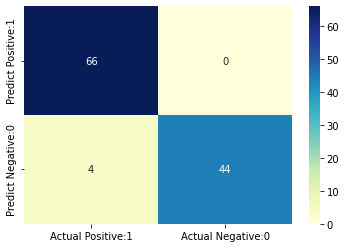

In [77]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

###### Classification metrices

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           B       0.94      1.00      0.97        66
           M       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

